**This notebook is an exercise in the [Python](https://www.kaggle.com/learn/python) course.  You can reference the tutorial at [this link](https://www.kaggle.com/colinmorris/loops-and-list-comprehensions).**

---


With all you've learned, you can start writing much more interesting programs. See if you can solve the problems below.

As always, run the setup code below before working on the questions.

In [1]:
from learntools.core import binder; binder.bind(globals())
from learntools.python.ex5 import *
print('Setup complete.')

Setup complete.


# 1.

Have you ever felt debugging involved a bit of luck? The following program has a bug. Try to identify the bug and fix it.

In [2]:
def has_lucky_number(nums):
    """Return whether the given list of numbers is lucky. A lucky list contains
    at least one number divisible by 7.
    """
    for num in nums:
        if num % 7 == 0:
            return True
        else:
            return False

Try to identify the bug and fix it in the cell below:

In [3]:
def has_lucky_number(nums):
    """Return whether the given list of numbers is lucky. A lucky list contains
    at least one number divisible by 7.
    """
    return any([num % 7 == 0 for num in nums])

# Check your answer
q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Remember that `return` causes a function to exit immediately. So our original implementation always ran for just one iteration. We can only return `False` if we've looked at every element of the list (and confirmed that none of them are lucky). Though we can return early if the answer is `True`:

```python
def has_lucky_number(nums):
    for num in nums:
        if num % 7 == 0:
            return True
    # We've exhausted the list without finding a lucky number
    return False
```

Here's a one-line version using a list comprehension with Python's `any` function (you can read about what it does by calling `help(any)`):

```python
def has_lucky_number(nums):
    return any([num % 7 == 0 for num in nums])
```


In [4]:
#q1.hint()
q1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> Remember that `return` causes a function to exit immediately. So our original implementation always ran for just one iteration. We can only return `False` if we've looked at every element of the list (and confirmed that none of them are lucky). Though we can return early if the answer is `True`:

```python
def has_lucky_number(nums):
    for num in nums:
        if num % 7 == 0:
            return True
    # We've exhausted the list without finding a lucky number
    return False
```

Here's a one-line version using a list comprehension with Python's `any` function (you can read about what it does by calling `help(any)`):

```python
def has_lucky_number(nums):
    return any([num % 7 == 0 for num in nums])
```


# 2.
Look at the Python expression below. What do you think we'll get when we run it? When you've made your prediction, uncomment the code and run the cell to see if you were right.

In [5]:
#[1, 2, 3, 4] > 2

R and Python have some libraries (like numpy and pandas) compare each element of the list to 2 (i.e. do an 'element-wise' comparison) and give us a list of booleans like `[False, False, True, True]`. 

Implement a function that reproduces this behaviour, returning a list of booleans corresponding to whether the corresponding element is greater than n.

In [6]:
def elementwise_greater_than(L, thresh):
    """Return a list with the same length as L, where the value at index i is 
    True if L[i] is greater than thresh, and False otherwise.
    
    >>> elementwise_greater_than([1, 2, 3, 4], 2)
    [False, False, True, True]
    """
    res = []
    for ele in L:
        res.append(ele > thresh)
    return res
    #return [ele > thresh for ele in L]

# Check your answer
q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Here's one solution:
```python
def elementwise_greater_than(L, thresh):
    res = []
    for ele in L:
        res.append(ele > thresh)
    return res
```

And here's the list comprehension version:
```python
def elementwise_greater_than(L, thresh):
    return [ele > thresh for ele in L]
```


In [ ]:
q2.solution()

# 3.

Complete the body of the function below according to its docstring.

In [7]:
def menu_is_boring(meals):
    """Given a list of meals served over some period of time, return True if the
    same meal has ever been served two days in a row, and False otherwise.
    """
    for i in range(len(meals)-1):
        if meals[i] == meals[i+1]:
            return True
    return False

# Check your answer
q3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 



```python
def menu_is_boring(meals):
    # Iterate over all indices of the list, except the last one
    for i in range(len(meals)-1):
        if meals[i] == meals[i+1]:
            return True
    return False
```

The key to our solution is the call to `range`. `range(len(meals))` would give us all the indices of `meals`. If we had used that range, the last iteration of the loop would be comparing the last element to the element after it, which is... `IndexError`! `range(len(meals)-1)` gives us all the indices except the index of the last element.

But don't we need to check if `meals` is empty? Turns out that `range(0) == range(-1)` - they're both empty. So if `meals` has length 0 or 1, we just won't do any iterations of our for loop.


In [8]:
#q3.hint()
q3.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 

```python
def menu_is_boring(meals):
    # Iterate over all indices of the list, except the last one
    for i in range(len(meals)-1):
        if meals[i] == meals[i+1]:
            return True
    return False
```

The key to our solution is the call to `range`. `range(len(meals))` would give us all the indices of `meals`. If we had used that range, the last iteration of the loop would be comparing the last element to the element after it, which is... `IndexError`! `range(len(meals)-1)` gives us all the indices except the index of the last element.

But don't we need to check if `meals` is empty? Turns out that `range(0) == range(-1)` - they're both empty. So if `meals` has length 0 or 1, we just won't do any iterations of our for loop.


# 4. <span title="A bit spicy" style="color: darkgreen ">🌶️</span>

Next to the Blackjack table, the Python Challenge Casino has a slot machine. You can get a result from the slot machine by calling `play_slot_machine()`. The number it returns is your winnings in dollars. Usually it returns 0.  But sometimes you'll get lucky and get a big payday. Try running it below:

In [9]:
play_slot_machine()

0

By the way, did we mention that each play costs $1? Don't worry, we'll send you the bill later.

On average, how much money can you expect to gain (or lose) every time you play the machine?  The casino keeps it a secret, but you can estimate the average value of each pull using a technique called the **Monte Carlo method**. To estimate the average outcome, we simulate the scenario many times, and return the average result.

Complete the following function to calculate the average value per play of the slot machine.

0.0206075


<AxesSubplot:>

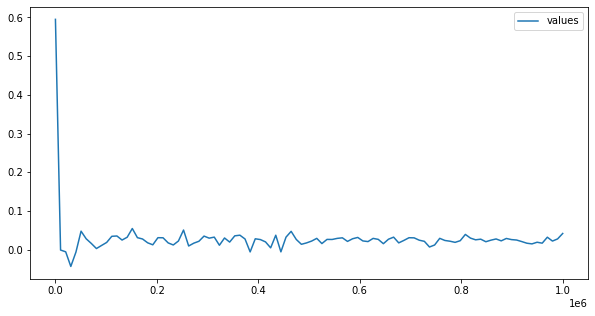

In [10]:
import random

def play_slot_machine():
    r = random.random()
    if r < .005:
        return 100
    elif r < .05:
        return 5
    elif r < .25:
        return 1.5
    else:
        return 0

def estimate_average_slot_payout(n_runs):
    """Run the slot machine n_runs times and return the average net profit per run.
    Example calls (note that return value is nondeterministic!):
    >>> estimate_average_slot_payout(1)
    -1
    >>> estimate_average_slot_payout(1)
    0.5
    """
    r = [play_slot_machine() for _ in range(n_runs)]
    return (sum(r) - n_runs) / n_runs

print(estimate_average_slot_payout(1000000))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

scale = np.linspace(100,1e6,100)
values = [estimate_average_slot_payout(int(i)) for i in scale]

df = pd.DataFrame({"values":values},index=scale)

df.plot(figsize=(10,5))

When you think you know the expected value per spin, run the code cell below to view the solution and get credit for answering the question.

In [11]:
# Check your answer (Run this code cell to receive credit!)
q4.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> The exact expected value of one pull of the slot machine is 0.025 - i.e. a little more than 2 cents. See? Not every game in the Python Challenge Casino is rigged against the player!

Because of the high variance of the outcome (there are some very rare high payout results that significantly affect the average) you might need to run your function with a very high value of `n_runs` to get a stable answer close to the true expectation.

If your answer is way higher than 0.025, then maybe you forgot to account for the $1 cost per play?

# Keep Going

Many programmers report that dictionaries are their favorite data structure. You'll get to **[learn about them](https://www.kaggle.com/colinmorris/strings-and-dictionaries)** (as well as strings) in the next lesson.

---




*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/161283) to chat with other Learners.*